In [1]:
!pip install pandas

In [2]:
!pip install numpy

In [2]:
import pandas as pd
import numpy as np

In [3]:
data=pd.read_csv("C:/Users/Lenovo/Downloads/LoanApprovalPrediction.csv")
data.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2.0,Graduate,Yes,5417,4196.0,267,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0.0,Not Graduate,No,2333,1516.0,95,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3.0,Graduate,No,3036,2504.0,158,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2.0,Graduate,No,4006,1526.0,168,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1.0,Graduate,No,12841,10968.0,349,360.0,1.0,Semiurban,N


In [4]:
print(data.info())
print(data.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 598 entries, 0 to 597
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            598 non-null    object 
 1   Gender             598 non-null    object 
 2   Married            598 non-null    object 
 3   Dependents         586 non-null    float64
 4   Education          598 non-null    object 
 5   Self_Employed      598 non-null    object 
 6   ApplicantIncome    598 non-null    int64  
 7   CoapplicantIncome  598 non-null    float64
 8   LoanAmount         598 non-null    int64  
 9   Loan_Amount_Term   584 non-null    float64
 10  Credit_History     549 non-null    float64
 11  Property_Area      598 non-null    object 
 12  Loan_Status        598 non-null    object 
dtypes: float64(4), int64(2), object(7)
memory usage: 60.9+ KB
None
       Dependents  ApplicantIncome  CoapplicantIncome  LoanAmount  \
count  586.000000       598.000000    

In [5]:
print(data.isnull().sum())

Loan_ID               0
Gender                0
Married               0
Dependents           12
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       49
Property_Area         0
Loan_Status           0
dtype: int64


In [6]:
# For simplicity, we'll drop rows with missing values
data.dropna(inplace=True)


In [15]:
print(data.isnull().sum())

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


In [8]:
pip install pandas scikit-learn numpy matplotlib seaborn


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [16]:
# Label Encoding for categorical variables
label_enc = LabelEncoder()
data['Gender'] = label_enc.fit_transform(data['Gender'])
data['Married'] = label_enc.fit_transform(data['Married'])
data['Education'] = label_enc.fit_transform(data['Education'])
data['Self_Employed'] = label_enc.fit_transform(data['Self_Employed'])
data['Property_Area'] = label_enc.fit_transform(data['Property_Area'])
data['Loan_Status'] = label_enc.fit_transform(data['Loan_Status'])
data['ApplicantIncome'] = label_enc.fit_transform(data['ApplicantIncome'])
data['CoapplicantIncome'] = label_enc.fit_transform(data['CoapplicantIncome'])
data['LoanAmount'] = label_enc.fit_transform(data['LoanAmount'])
data['Loan_Amount_Term'] = label_enc.fit_transform(data['Loan_Amount_Term'])
data['Credit_History'] = label_enc.fit_transform(data['Credit_History'])

# Convert 'Dependents' into numerical by replacing '3+' with 3
data['Dependents'] = data['Dependents'].replace('3+', 3).astype(int)


In [9]:
# Feature scaling for numerical variables (applicant/coapplicant income, loan amount, etc.)
scaler = StandardScaler()
data[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']] = scaler.fit_transform(data[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']])


In [10]:
# Split data into features and target
X = data.drop(columns=['Loan_ID', 'Loan_Status'])  # 'Loan_ID' is irrelevant for prediction
y = data['Loan_Status']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [18]:
data_encoded = data.copy()


In [19]:
print(data_encoded.dtypes)


Loan_ID              object
Gender                int64
Married               int64
Dependents            int64
Education             int64
Self_Employed         int64
ApplicantIncome       int64
CoapplicantIncome     int64
LoanAmount            int64
Loan_Amount_Term      int64
Credit_History        int64
Property_Area         int64
Loan_Status           int64
dtype: object


In [22]:
from sklearn.preprocessing import LabelEncoder

# Create a copy of the dataset to keep the original intact
data_encoded = data.copy()

# List of binary categorical columns
binary_columns = ['Gender', 'Married', 'Education', 'Self_Employed', 'Loan_Status']

# Apply LabelEncoder to binary categorical columns
le = LabelEncoder()
for col in binary_columns:
    data_encoded[col] = le.fit_transform(data_encoded[col])

# For categorical columns with more than two categories, use pd.get_dummies
data_encoded = pd.get_dummies(data_encoded, columns=['Property_Area', 'Dependents'], drop_first=True)

# Check the new data types to ensure all are numeric
print(data_encoded.dtypes)


Loan_ID              object
Gender                int64
Married               int64
Education             int64
Self_Employed         int64
ApplicantIncome       int64
CoapplicantIncome     int64
LoanAmount            int64
Loan_Amount_Term      int64
Credit_History        int64
Loan_Status           int64
Property_Area_1        bool
Property_Area_2        bool
Dependents_1           bool
Dependents_2           bool
Dependents_3           bool
dtype: object


In [30]:
# After preprocessing and training a Random Forest
from sklearn.ensemble import RandomForestClassifier

# Train the random forest classifier (assuming you already have X and y)
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Get feature importance
importances = rf_model.feature_importances_

# Create a DataFrame for feature importance
import pandas as pd
feature_importance_data = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Sort by importance
feature_importance_data = feature_importance_data.sort_values(by='Importance', ascending=False)

# Print the most important features
print(feature_importance_data)


              Feature  Importance
9      Credit_History    0.240821
5     ApplicantIncome    0.212648
7          LoanAmount    0.187798
6   CoapplicantIncome    0.112198
10      Property_Area    0.051720
8    Loan_Amount_Term    0.051608
2          Dependents    0.050323
3           Education    0.030568
1             Married    0.025365
0              Gender    0.019436
4       Self_Employed    0.017515


In [20]:
# Initialize RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [23]:
# Make predictions
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy*100:.2f}%')

# Confusion Matrix and Classification Report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 77.85%
[[25 22]
 [13 98]]
              precision    recall  f1-score   support

           0       0.66      0.53      0.59        47
           1       0.82      0.88      0.85       111

    accuracy                           0.78       158
   macro avg       0.74      0.71      0.72       158
weighted avg       0.77      0.78      0.77       158



Confusion Matrix:
[[25 22]
 [13 98]]


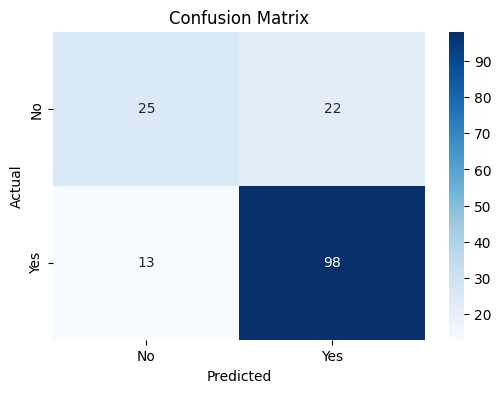

In [25]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate predictions
y_pred = model.predict(X_test)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [22]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameters to tune
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the grid search
grid_search.fit(X_train, y_train)

# Print best parameters
print(grid_search.best_params_)

# Use the best estimator for prediction
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

# Evaluate the tuned model
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f'Tuned Accuracy: {accuracy_best*100:.2f}%')


Fitting 5 folds for each of 36 candidates, totalling 180 fits
{'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}
Tuned Accuracy: 79.11%


In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC


Logistic Regression Accuracy: 0.8164556962025317
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.47      0.60        47
           1       0.81      0.96      0.88       111

    accuracy                           0.82       158
   macro avg       0.83      0.72      0.74       158
weighted avg       0.82      0.82      0.80       158



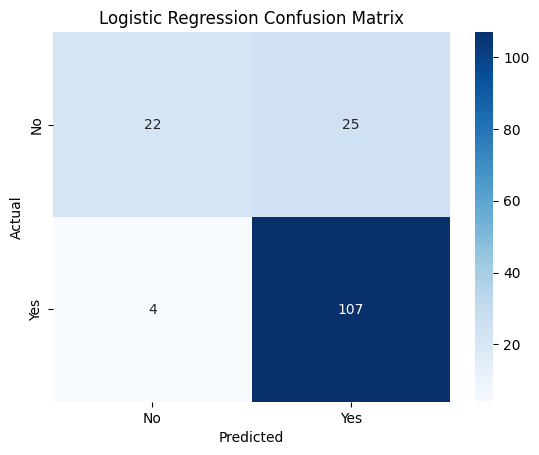

In [27]:
# Initialize Logistic Regression model
log_reg = LogisticRegression()

# Train the model
log_reg.fit(X_train, y_train)

# Make predictions
y_pred_log = log_reg.predict(X_test)

# Evaluate the model
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print("Classification Report:\n", classification_report(y_test, y_pred_log))

# Confusion Matrix
cm_log = confusion_matrix(y_test, y_pred_log)
sns.heatmap(cm_log, annot=True, fmt="d", cmap="Blues", xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


KNN Accuracy: 0.7151898734177216
Classification Report:
               precision    recall  f1-score   support

           0       0.55      0.26      0.35        47
           1       0.74      0.91      0.82       111

    accuracy                           0.72       158
   macro avg       0.64      0.58      0.58       158
weighted avg       0.68      0.72      0.68       158



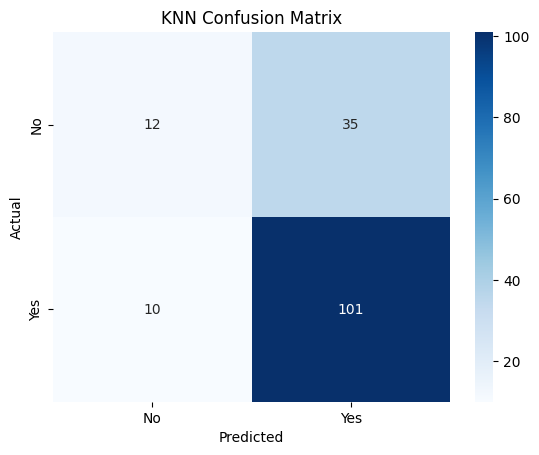

In [28]:
# Initialize KNN model
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn.fit(X_train, y_train)

# Make predictions
y_pred_knn = knn.predict(X_test)

# Evaluate the model
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))

# Confusion Matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm_knn, annot=True, fmt="d", cmap="Blues", xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('KNN Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Decision Tree Accuracy: 0.7151898734177216
Classification Report:
               precision    recall  f1-score   support

           0       0.52      0.62      0.56        47
           1       0.82      0.76      0.79       111

    accuracy                           0.72       158
   macro avg       0.67      0.69      0.68       158
weighted avg       0.73      0.72      0.72       158



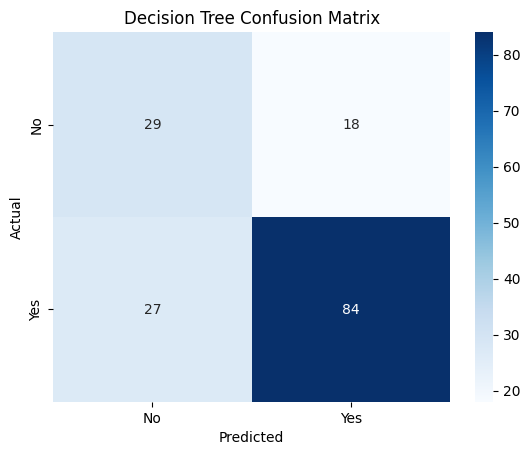

In [29]:

# Initialize Decision Tree model
dt = DecisionTreeClassifier()

# Train the model
dt.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt.predict(X_test)

# Evaluate the model
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))

# Confusion Matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm_dt, annot=True, fmt="d", cmap="Blues", xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


SVM Accuracy: 0.8037974683544303
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.47      0.59        47
           1       0.81      0.95      0.87       111

    accuracy                           0.80       158
   macro avg       0.80      0.71      0.73       158
weighted avg       0.80      0.80      0.79       158



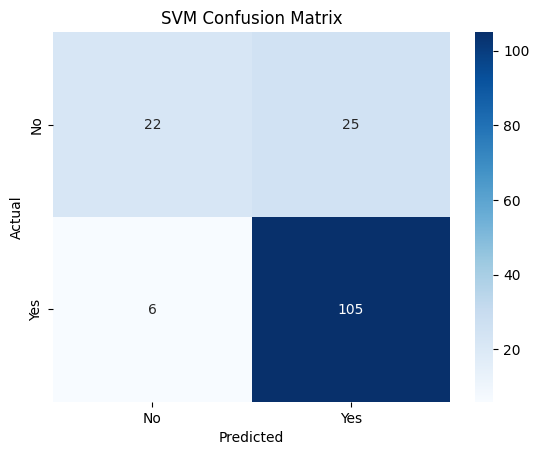

In [30]:
# Initialize SVM model
svm = SVC()

# Train the model
svm.fit(X_train, y_train)

# Make predictions
y_pred_svm = svm.predict(X_test)

# Evaluate the model
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))

# Confusion Matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Blues", xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Random Forest Accuracy: 0.7784810126582279
Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.53      0.59        47
           1       0.82      0.88      0.85       111

    accuracy                           0.78       158
   macro avg       0.74      0.71      0.72       158
weighted avg       0.77      0.78      0.77       158



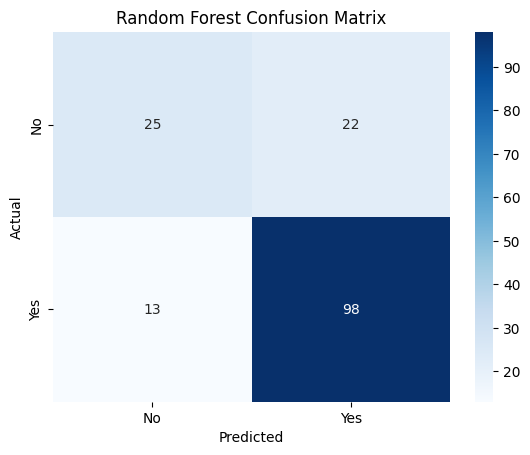

In [32]:
# Initialize Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf.predict(X_test)

# Evaluate the model
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues", xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [33]:
print(f"Logistic Regression Accuracy: {accuracy_score(y_test, y_pred_log):.2f}")
print(f"KNN Accuracy: {accuracy_score(y_test, y_pred_knn):.2f}")
print(f"Decision Tree Accuracy: {accuracy_score(y_test, y_pred_dt):.2f}")
print(f"SVM Accuracy: {accuracy_score(y_test, y_pred_svm):.2f}")
print(f"Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf):.2f}")


Logistic Regression Accuracy: 0.82
KNN Accuracy: 0.72
Decision Tree Accuracy: 0.72
SVM Accuracy: 0.80
Random Forest Accuracy: 0.78
